In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mySymbol= "EURUSD_Daily_BarChartHistCleaned.csv"
myDir="./myDataset/{}".format(mySymbol)
df = pd.read_csv(myDir, sep=",")
df.head()
# df['Direction']='0' if df['Open']>df['Close'] else '1'

,Current_Open,Last_High,Last_Low,Last_Close,Last_Volume,Last_ATR,Last_VWAP1,Last_VWAP2,Last_VWAP3,"Direction S-0,B-1"
0,1.22450,1.23096,1.22276,1.22521,131442,92.8,12247.100000,12247.100000,12247.100000,1
1,1.22945,1.23058,1.22450,1.22986,120118,60.8,12263.100000,12256.884097,12256.884097,1
2,1.23254,1.23495,1.22657,1.23263,170441,83.8,12283.133333,12266.294200,12266.294200,1
3,1.22689,1.23444,1.22452,1.22693,127034,99.2,12313.833333,12282.322895,12282.322895,1
4,1.22142,1.22846,1.21932,1.22179,141651,91.4,12286.300000,12283.121622,12283.121622,1


In [10]:
X=tf.convert_to_tensor(df[[ 'Current_Open', 'Last_High', 'Last_Low', 'Last_Close']])
y=tf.constant(df['Direction  S-0,B-1'])
X_train=X[:300]
y_train=y[:300]
X_test=X[300:310]
y_test=y[300:310]


In [15]:
# tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
#     tf.keras.layers.Dense(50,activation='relu'),
#     tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1)])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=['mae'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2476 - mae: 1.2476
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0948 - mae: 1.0948
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9477 - mae: 0.9477
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8064 - mae: 0.8064
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6708 - mae: 0.6708
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5411 - mae: 0.5411
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4200 - mae: 0.4200
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3677 - mae: 0.3677
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3731 - mae: 0.3731
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3694 - mae: 0.3694
Epoch 11/100
10/10 [==============================] - 0s 3m

10/10 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 0.3646
Epoch 88/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3647 - mae: 0.3647
Epoch 89/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3647 - mae: 0.3647
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3648 - mae: 0.3648
Epoch 91/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 0.3646
Epoch 92/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 0.3646
Epoch 93/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 0.3646
Epoch 94/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3646 - mae: 0.3646
Epoch 95/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3647 - mae: 0.3647
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3649 - mae: 0.3649
Epoch 97/100
10/10 [==============================] - 0s 2ms/st

In [16]:
y_pred=model.predict(X_test)
# y_pred, y_test

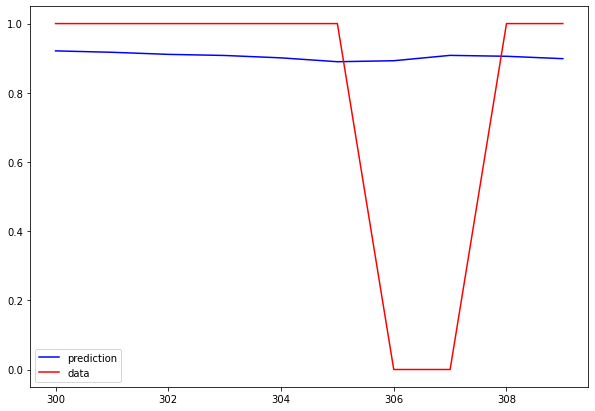

In [21]:
plt.figure(figsize=(10,7))
plt.plot(df.index[300:310],y_pred,c='b', label='prediction')
plt.plot(df.index[300:310],y_test,c='r', label='data') 
plt.legend()